# Focal Plane Setup Diagnostics

In [1]:
%matplotlib inline

In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
import pathlib

In [4]:
import pandas as pd

In [3]:
DESI = pathlib.Path('/global/cfs/cdirs/desi')
DATA = DESI / 'spectro' / 'data'
EON = DESI / 'engineering' / 'focalplane' / 'endofnight'

In [128]:
def get_fpsetup(night, dtmax=30, save=None):
    
    moves_path = EON / str(night) / f'moves-{night}.csv.gz'
    assert moves_path.exists()
    moves = pd.read_csv(moves_path)
    
    sel = moves.exposure_id > 0
    by_expid = moves[sel].groupby('exposure_id').agg(dict(exposure_iter='max'))
    expid = by_expid.index[0]
    maxiter = by_expid.iloc[0].exposure_iter
    if maxiter < 2:
        print(f'Unexpected maxiter={maxiter} for first expid {expid} on {night}')
    
    sel = moves.exposure_id == expid
    M = moves[sel]
    t0 = M.time_recorded.min()
    dt = 60 * np.array(M.time_recorded - t0)
    duration = np.max(dt)
    
    # Get elapsed time to first move in next exposure.
    sel = moves.exposure_id > expid
    dtnext = 60 * (moves[sel].time_recorded.min() - t0)
    delay = dtnext-duration

    print(f'setup duration {duration:.2f} min, time to next exp is {dtnext:.2f}, delay is {delay:.2f} min')
    
    fig, ax = plt.subplots(figsize=(8, 4))
    
    bins = np.linspace(0, dtmax, 51)
    allsel = np.zeros(len(M), bool)
    notes = ['disamb', 'tucking', 'freeze', '=R', '=S']
    dt_by_note = [ ]
    for note in notes:
        sel = M.log_note.str.contains(note)
        allsel |= sel
        print(note, np.count_nonzero(sel), len(sel))
        dt_by_note.append(dt[sel])
    
    notes[-2] = 'denied'
    notes[-1] = 'FVC'

    ax.hist(dt_by_note, bins=bins, stacked=True, label=notes)
    ax.axvline(dtnext, c='k', ls='--', label='next')
    ax.text(dtnext - 0.5, 20, f'delay = {delay:.1f} min', ha='right')
    ax.legend()
    
    ax.set(xlabel='Elapsed time [mins]', ylabel='Positioners', yscale='log', xlim=(0,dtmax), ylim=(1, 6000))
    ax.text(0.5, 1.02, f'{night} {expid} {maxiter+1} iters', ha='center', va='bottom', transform=ax.transAxes)
    
    print(M[~allsel].log_note.unique())
    
    plt.tight_layout()
    if save:
        plt.savefig(save)

setup duration 12.11 min, time to next exp is 23.79, delay is 11.67 min
disamb 13208 59748
tucking 11 59748
freeze 5 59748
=R 8 59748
=S 46520 59748
[]


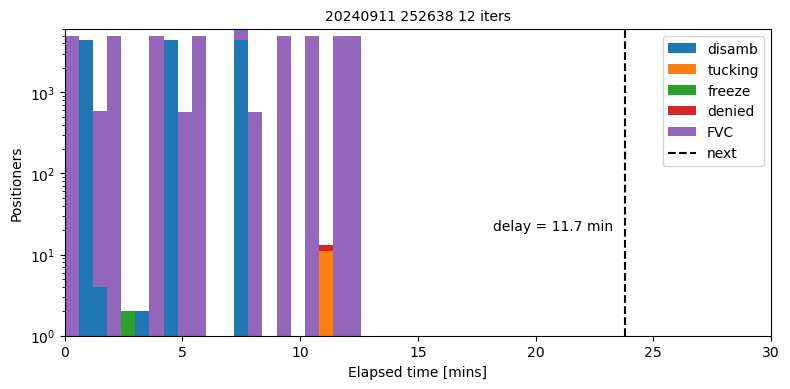

In [129]:
get_fpsetup(20240911)

setup duration 2.50 min, time to next exp is 8.70, delay is 6.20 min
disamb 0 14937
tucking 6 14937
freeze 0 14937
=R 13 14937
=S 14918 14937
[]


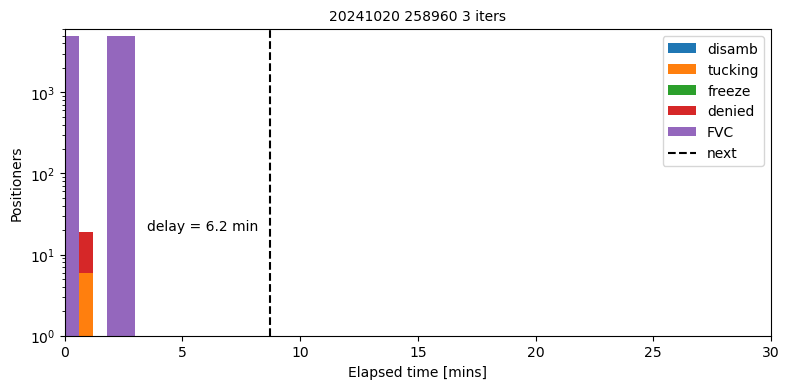

In [130]:
get_fpsetup(20241020)

setup duration 1.91 min, time to next exp is 21.01, delay is 19.09 min
disamb 0 14937
tucking 2 14937
freeze 0 14937
=R 13 14937
=S 14922 14937
[]


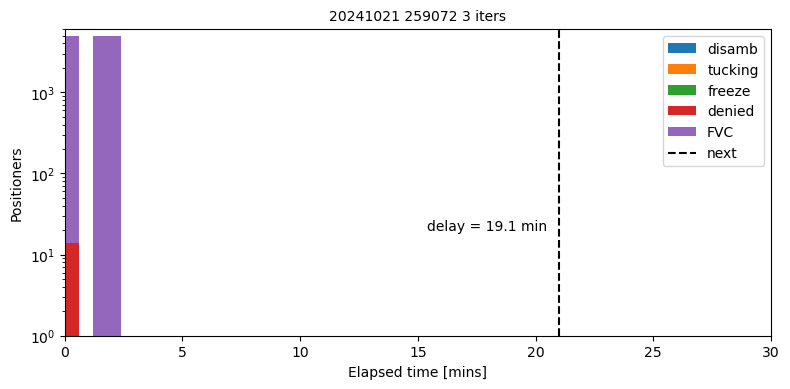

In [131]:
get_fpsetup(20241021)

setup duration 10.06 min, time to next exp is 21.19, delay is 11.13 min
disamb 17501 54179
tucking 0 54179
freeze 10 54179
=R 56 54179
=S 36616 54179
[]


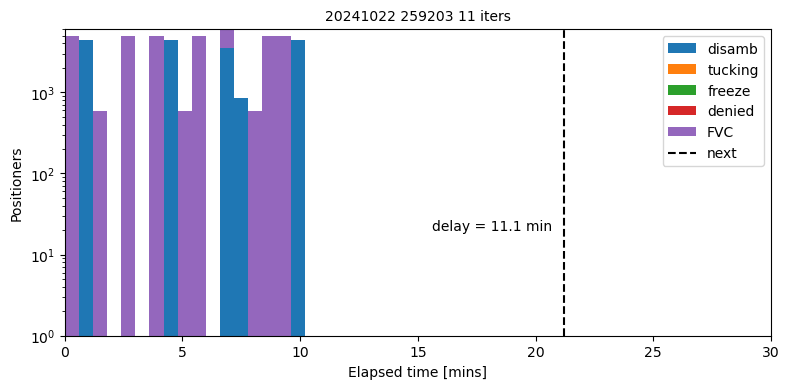

In [132]:
get_fpsetup(20241022)

setup duration 1.74 min, time to next exp is 16.12, delay is 14.38 min
disamb 0 14937
tucking 1 14937
freeze 0 14937
=R 12 14937
=S 14924 14937
[]


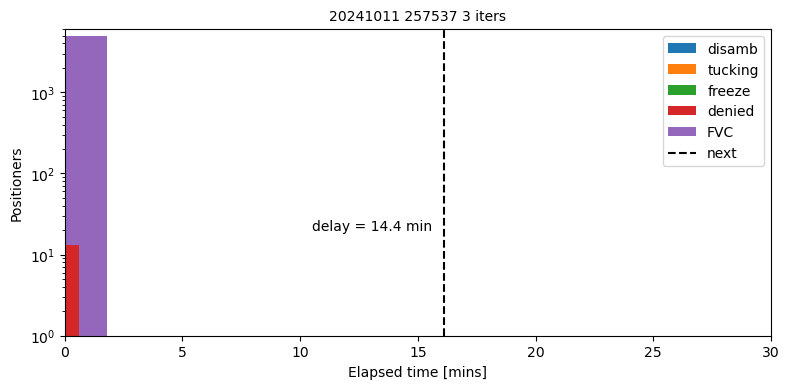

In [133]:
get_fpsetup(20241011)

setup duration 12.76 min, time to next exp is 24.91, delay is 12.14 min
disamb 13140 59748
tucking 38 59748
freeze 3 59748
=R 52 59748
=S 46518 59748
[]


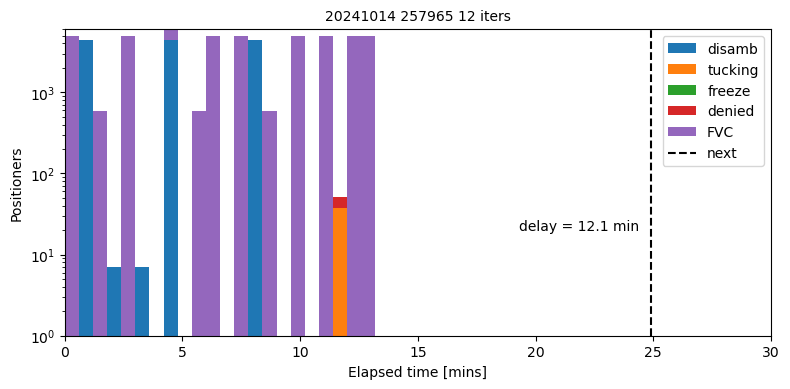

In [134]:
get_fpsetup(20241014, save='setup-20241014.jpg')

setup duration 5.95 min, time to next exp is 16.33, delay is 10.39 min
disamb 4381 29874
tucking 27 29874
freeze 2 29874
=R 26 29874
=S 25440 29874
[]


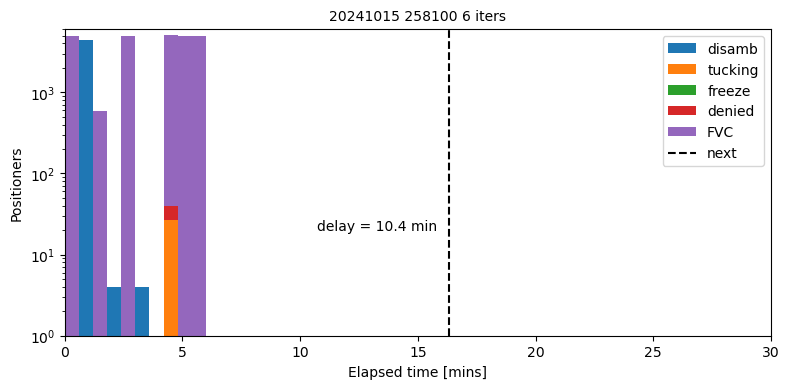

In [135]:
get_fpsetup(20241015)

setup duration 5.53 min, time to next exp is 29.69, delay is 24.16 min
disamb 4380 29874
tucking 31 29874
freeze 1 29874
=R 26 29874
=S 25436 29874
['move canceled due to communication error.']


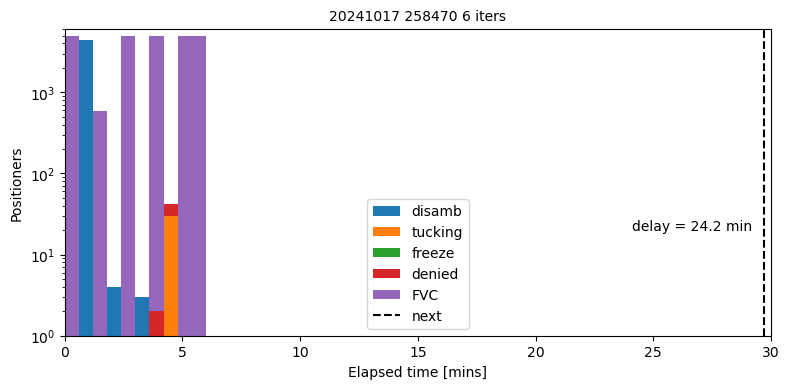

In [136]:
get_fpsetup(20241017)

setup duration 10.06 min, time to next exp is 21.19, delay is 11.13 min
disamb 17501 54179
tucking 0 54179
freeze 10 54179
=R 56 54179
=S 36616 54179
[]


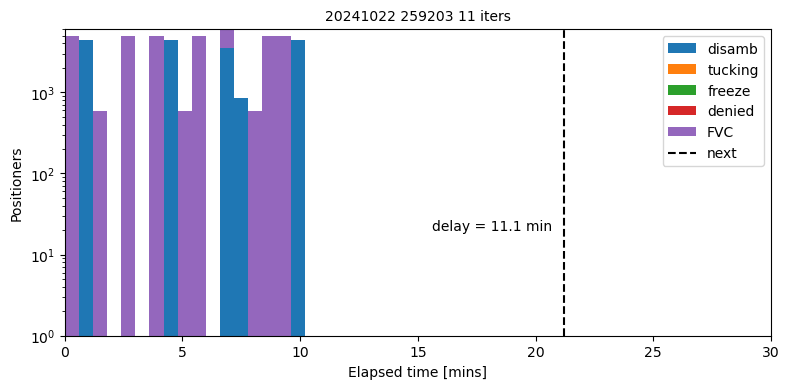

In [139]:
get_fpsetup(20241022)

Unexpected maxiter=0 for first expid 259336 on 20241023
setup duration 0.08 min, time to next exp is 9.05, delay is 8.97 min
disamb 0 5020
tucking 0 5020
freeze 3 5020
=R 653 5020
=S 0 5020
['TP=(126.559, 103.227); XYZ=(392.849, 26.978, -17.367)'
 'TP=(-173.595, 56.646); XYZ=(345.742, 147.245, -15.741)'
 'TP=(-191.237, 110.264); XYZ=(265.010, 20.957, -7.758)' ...
 'TP=(-80.438, 142.221); XYZ=(287.638, 115.046, -10.593)'
 'TP=(166.621, 117.754); XYZ=(265.649, 165.544, -10.818)'
 'TP=(104.000, 143.070); XYZ=(278.242, 151.521, -11.088)']


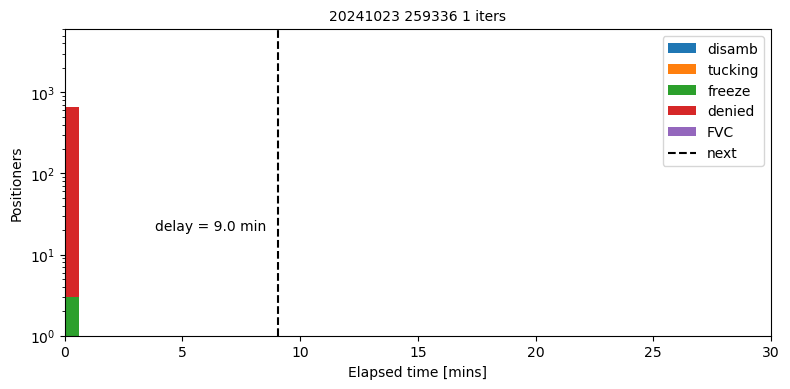

In [154]:
get_fpsetup(20241023)

setup duration 13.76 min, time to next exp is 25.14, delay is 11.38 min
disamb 17493 74685
tucking 13 74685
freeze 12 74685
=R 80 74685
=S 57091 74685
[]


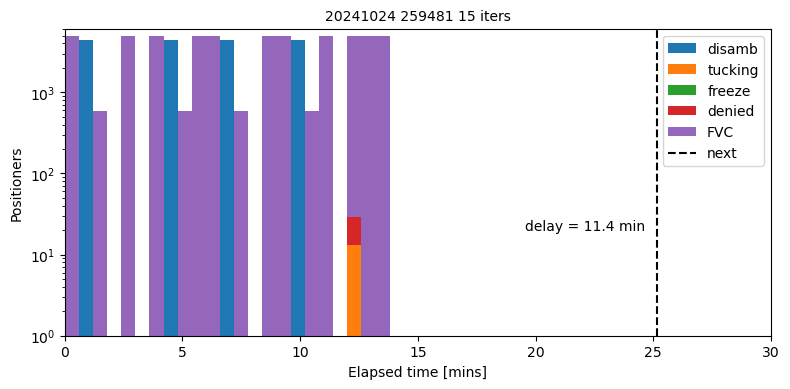

In [153]:
get_fpsetup(20241024)

## Nights before Recovering Linear Phis

setup duration 13.95 min, time to next exp is 23.23, delay is 9.28 min
disamb 16724 74655
tucking 6 74655
freeze 8 74655
=R 0 74655
=S 57917 74655
[]


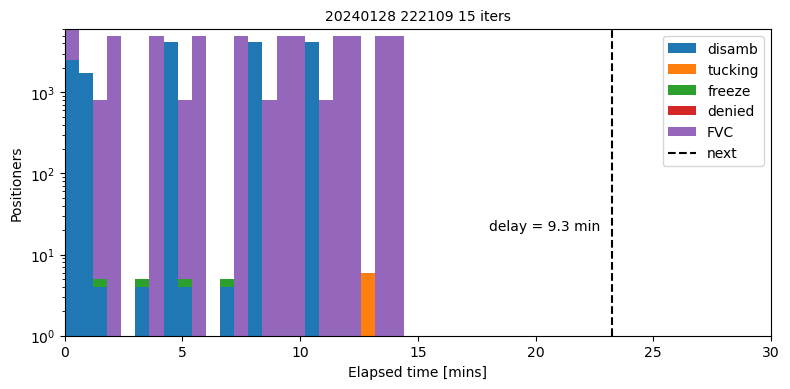

In [140]:
get_fpsetup(20240128)

setup duration 11.30 min, time to next exp is 27.00, delay is 15.70 min
disamb 16744 74685
tucking 0 74685
freeze 8 74685
=R 0 74685
=S 57933 74685
[]


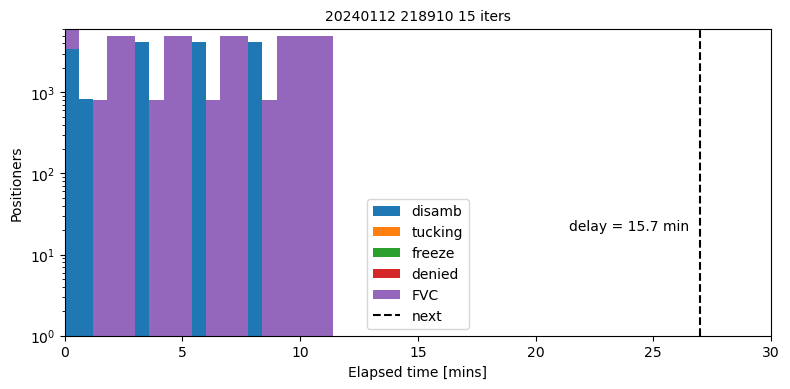

In [144]:
get_fpsetup(20240112)

setup duration 11.25 min, time to next exp is 26.97, delay is 15.72 min
disamb 16744 74685
tucking 0 74685
freeze 8 74685
=R 0 74685
=S 57933 74685
[]


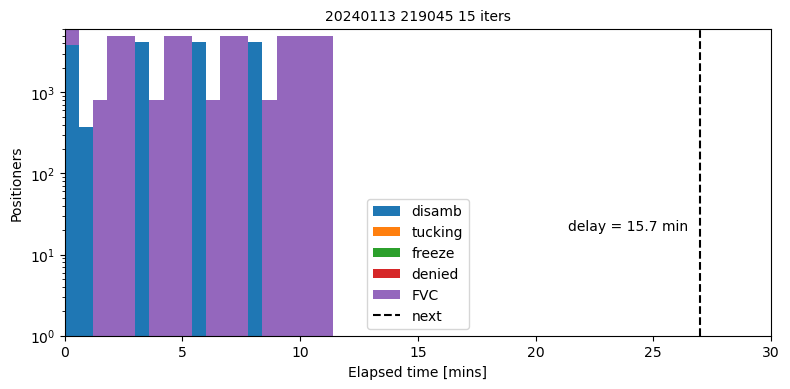

In [145]:
get_fpsetup(20240113)

setup duration 11.34 min, time to next exp is 25.48, delay is 14.14 min
disamb 16744 74685
tucking 0 74685
freeze 8 74685
=R 0 74685
=S 57933 74685
[]


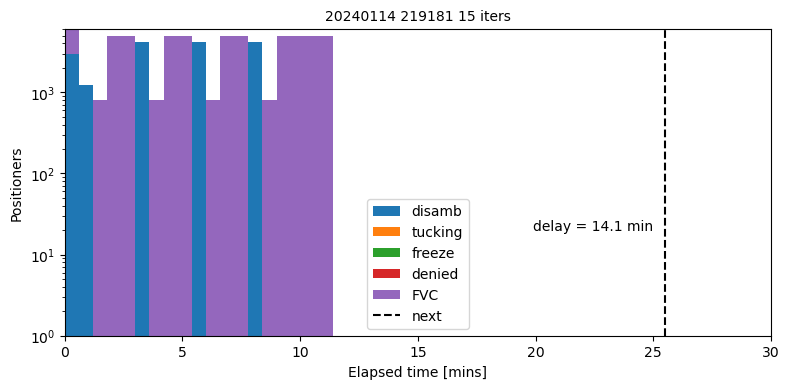

In [146]:
get_fpsetup(20240114)

setup duration 12.33 min, time to next exp is 21.04, delay is 8.71 min
disamb 16748 74685
tucking 2 74685
freeze 8 74685
=R 0 74685
=S 57927 74685
[]


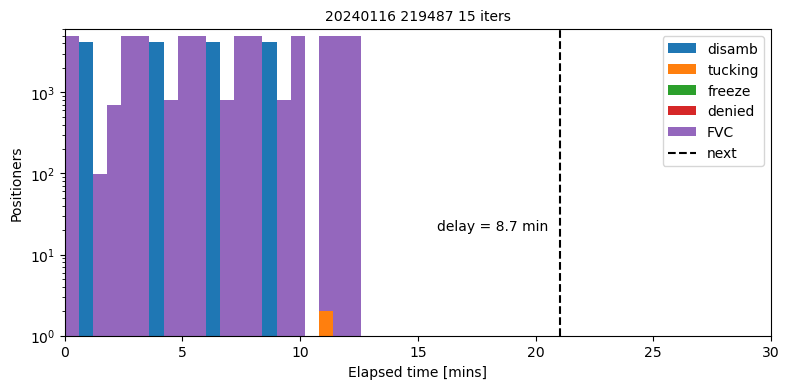

In [148]:
get_fpsetup(20240116)

setup duration 11.38 min, time to next exp is 22.05, delay is 10.67 min
disamb 16748 74685
tucking 0 74685
freeze 8 74685
=R 0 74685
=S 57929 74685
[]


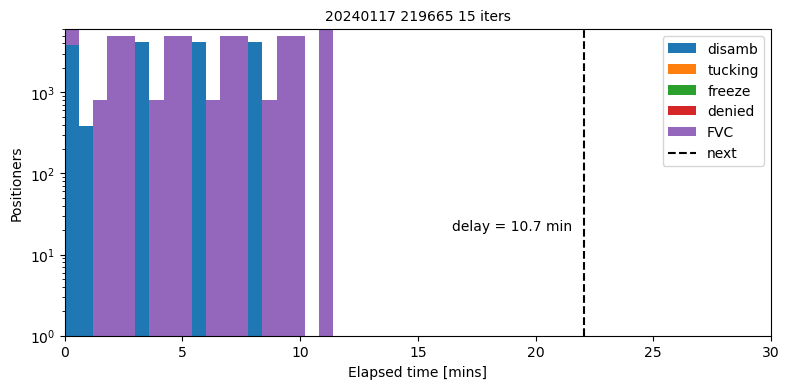

In [149]:
get_fpsetup(20240117)

setup duration 1.45 min, time to next exp is 15.26, delay is 13.81 min
disamb 0 14937
tucking 0 14937
freeze 0 14937
=R 0 14937
=S 14937 14937
[]


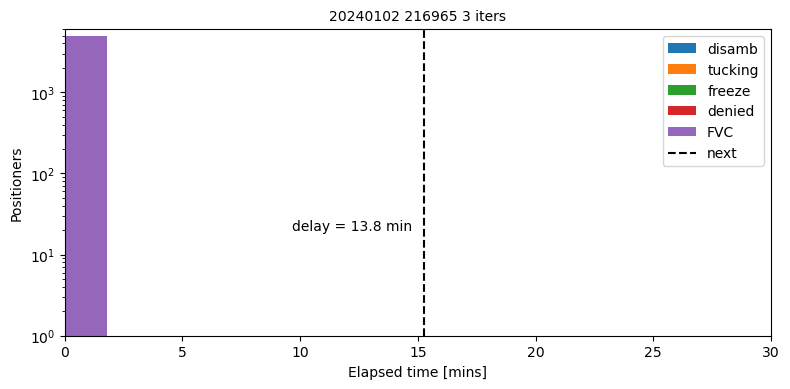

In [152]:
get_fpsetup(20240102)

setup duration 13.23 min, time to next exp is 25.22, delay is 11.99 min
disamb 16748 74685
tucking 2 74685
freeze 8 74685
=R 0 74685
=S 57927 74685
[]


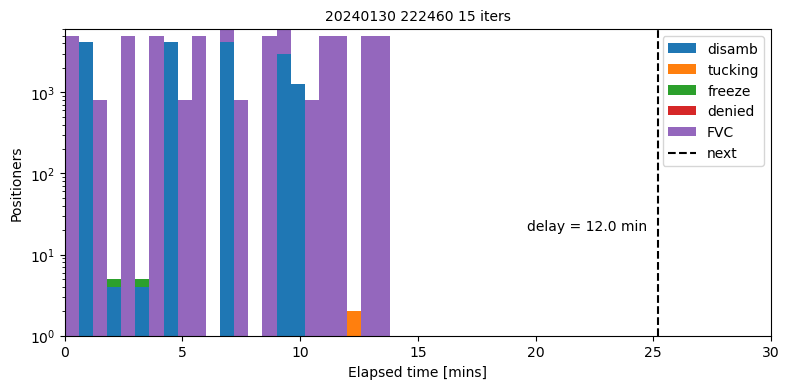

In [142]:
get_fpsetup(20240130)

setup duration 11.61 min, time to next exp is 34.66, delay is 23.06 min
disamb 16744 74685
tucking 4 74685
freeze 8 74685
=R 0 74685
=S 57929 74685
[]


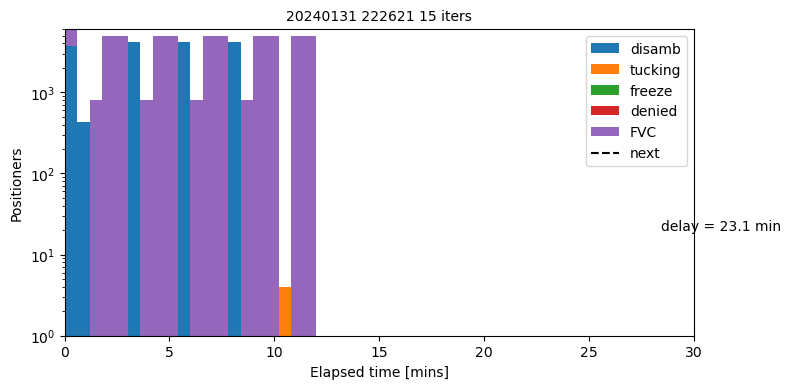

In [143]:
get_fpsetup(20240131)